In [1]:
from fastai.vision.all import *

In [2]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [15]:
searches = "spaghetti","macaroni","penne","fusilli","farfalle","rigatoni","gnocchi","ravioli"
path = Path('pasta')
for search in searches:
    dest = (path/search)
    dest.mkdir(exist_ok=True, parents=True)
    urls = search_images(f"{search} pasta", max_images=100)
    download_images(dest, urls=urls)
    time.sleep(5)
    resize_images(dest, max_size=400, dest=dest)

/Users/shayankoohi/Documents/Developer/Machine Learning Projects/.venv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:935: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [16]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

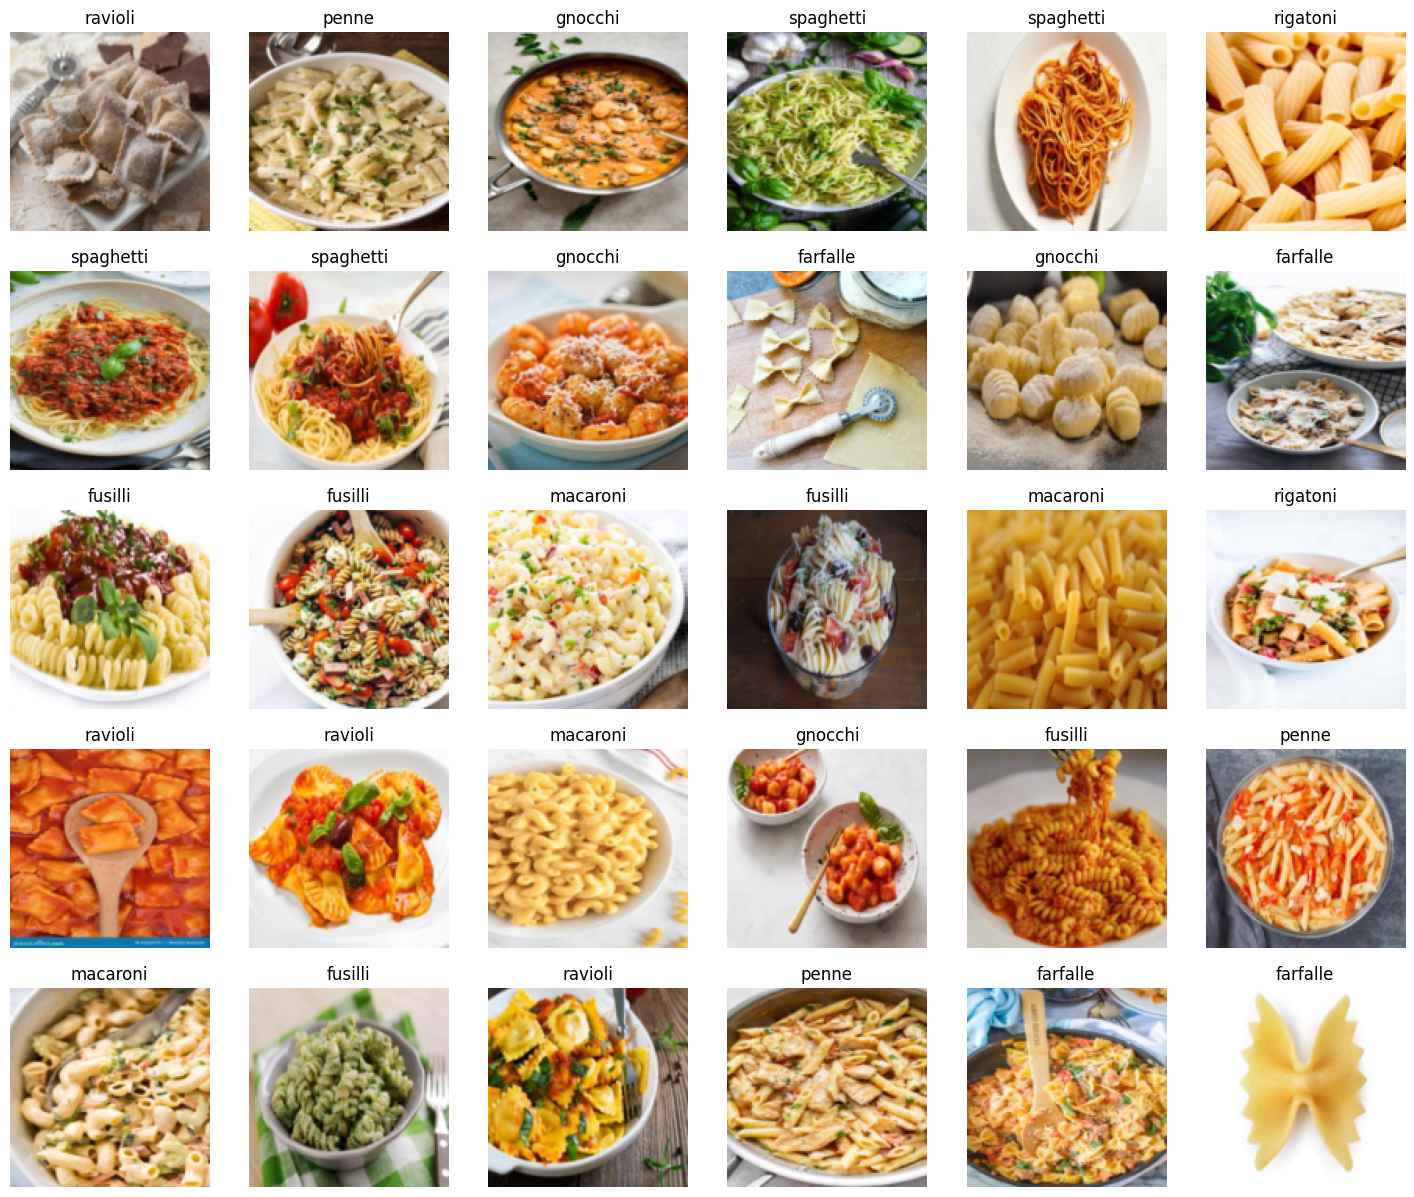

In [21]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128, ResizeMethod.Squish)
).dataloaders(path, bs=32)
dls.show_batch(max_n=30)

In [28]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(100)

epoch,train_loss,valid_loss,error_rate,time
0,2.940861,1.915168,0.586667,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.684476,1.659014,0.606667,00:02
1,1.328210,1.588535,0.546667,00:02
2,1.099812,1.526590,0.506667,00:02
3,0.928258,1.496585,0.500000,00:02
4,0.760922,1.469754,0.486667,00:02
5,0.608410,1.439459,0.466667,00:02
6,0.493994,1.450661,0.433333,00:02
7,0.392805,1.433084,0.420000,00:02
8,0.321986,1.383280,0.400000,00:02
9,0.259790,1.436711,0.393333,00:02


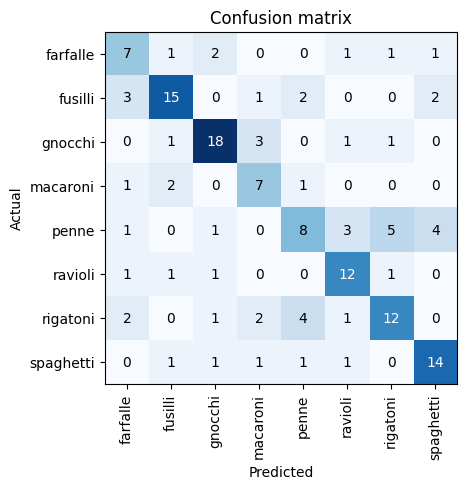

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [23]:
from fastai.vision.widgets import *
interp = ClassificationInterpretation.from_learner(learn)
cleaner = ImageClassifierCleaner(learn)
cleaner

In [24]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)